In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(
    data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch0.h5"
)

particle_set, _ = aoj(
    num_jets=1_000_000,
    download=False,
    features={"continuous":None, "discrete": "tokens"},
)


/home/df630/Multimodal-Bridges/multimodal_bridges/datamodules/aoj.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  list_discrete_feats.append(torch.tensor(feats[features["discrete"]]))


In [2]:
from datamodules.utils import JetFeatures, ParticleClouds

sets = ParticleClouds(particle_set)
particle_sets = JetFeatures(particle_set)

## Token ocurrence per jet

In [3]:
token_freqs = torch.tensor(
    [
        (sets.isPhoton.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isNeutralHadron.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isNegativeHadron.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isPositiveHadron.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isElectron.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isPositron.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isMuon.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
        (sets.isAntiMuon.sum(dim=1) / sets.multiplicity.squeeze(-1)).mean(),
    ]
)

In [4]:
token_freqs

tensor([0.3038, 0.0852, 0.2984, 0.3077, 0.0013, 0.0014, 0.0011, 0.0011])

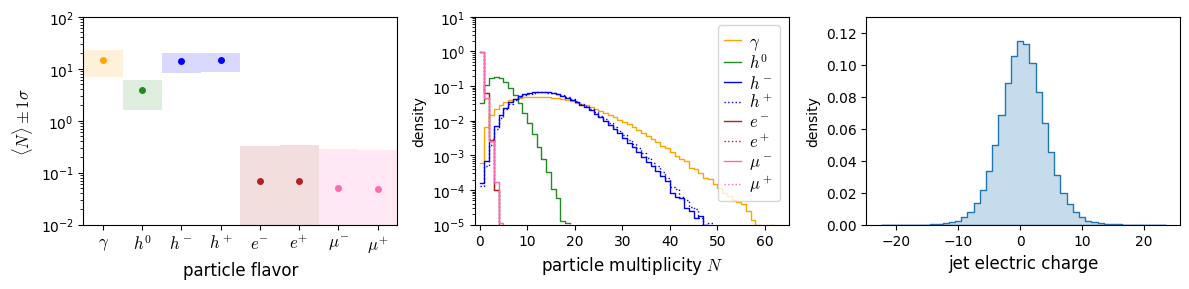

In [5]:
_, ax = plt.subplots(1, 3, figsize=(12, 3))

particle_sets.plot_flavor_count_per_jet(
    markersize=8,

    color=[
        "orange",
        "forestgreen",
        "blue",
        "blue",
        "firebrick",
        "firebrick",
        "hotpink",
        "hotpink",
        "hotpink",
    ],
    ax=ax[0],
)

fill = False
alpha = 1 

sets.histplot('num_Photon',ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1,log_scale=(False, True),  stat='density', color='orange',lw=1,  label=r'$\gamma$')
sets.histplot("num_NeutralHadron",  ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True),  stat='density', color='forestgreen',lw=1,  label=r'$h^0$')
sets.histplot("num_NegativeHadron", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True) , stat='density', color='blue', lw=1, label=r'$h^-$')
sets.histplot("num_PositiveHadron",  ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100), binwidth=1, log_scale=(False, True), ls=':', stat='density', color='blue', lw=1, label=r'$h^+$')
sets.histplot("num_Electron", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='firebrick', lw=1,  label=r'$e^-$')
sets.histplot("num_Positron", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='firebrick', lw=1, ls=':', label=r'$e^+$')
sets.histplot("num_Muon", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='hotpink', lw=1, label=r'$\mu^-$')
sets.histplot("num_AntiMuon", ax=ax[1], fill=fill, alpha=alpha, binrange=(0, 100),binwidth=1, log_scale=(False, True),  stat='density', color='hotpink', lw=1, ls=':', label=r'$\mu^+$')
particle_sets.histplot("charge", discrete=True, ax=ax[2], alpha=0.25, label="electric charge", stat='density', )

ax[0].set_xlim(-0.5,7.5)
ax[0].set_ylim(0.01,100)
ax[1].set_ylim(1e-5,10)
ax[1].set_xlim(-1,65)
ax[2].set_ylim(0.0,0.13)

ax[0].set_xlabel('particle flavor', fontsize=12)
ax[1].set_xlabel('particle multiplicity $N$', fontsize=12)
ax[1].set_ylabel('density', fontsize=10)
ax[2].set_xlabel('jet electric charge', fontsize=12)
ax[2].set_ylabel('density', fontsize=10)
ax[1].legend(fontsize=12, loc="upper right", handletextpad=0.5, handlelength=1., labelspacing=0.1)

plt.tight_layout()
plt.savefig("particle_discrete_feats.png", dpi=1000)


plt.show()



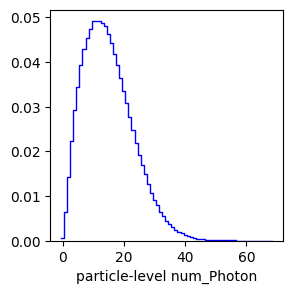

In [39]:
sets.histplot("num_Photon", fill=False, discrete=True,  stat='density', color='blue', lw=1, label=r'$p_T$')

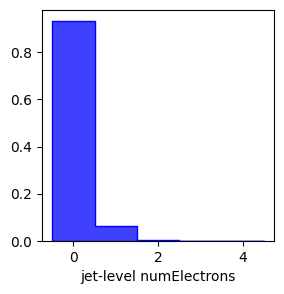

In [44]:
particle_sets.histplot("numElectrons", discrete=True,  stat='density', color='blue', lw=1, label=r'$p_T$')

In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt
from datamodules.aoj import AspenOpenJets

aoj = AspenOpenJets(
    data_dir="/home/df630/Multimodal-Bridges/data/aoj", data_files="RunG_batch0.h5"
)

particle_set, _ = aoj(
    num_jets=10_000,
    download=False,
    features={"continuous":None, "discrete": "onehot"},
)


In [2]:
particle_set.continuous.shape, particle_set.discrete

(torch.Size([10000, 150, 8]), None)

In [3]:
particle_set.discrete = particle_set.continuous.clone()[:, :, -8 :]
particle_set.discrete = torch.argmax(particle_set.discrete, dim=-1).unsqueeze(-1)
del particle_set.continuous

In [4]:
particle_set

TensorMultiModal(time=None, continuous=None, discrete=tensor([[[0],
         [0],
         [0],
         ...,
         [3],
         [0],
         [0]],

        [[3],
         [0],
         [0],
         ...,
         [3],
         [0],
         [2]],

        [[0],
         [0],
         [0],
         ...,
         [2],
         [0],
         [0]],

        ...,

        [[0],
         [3],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [2]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [3]]]), mask=tensor([[[1],
         [1],
         [0],
         ...,
         [1],
         [0],
         [1]],

        [[1],
         [1],
         [0],
         ...,
         [1],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [0],
         [1]],

        ...,

        [[1]

In [3]:
particle_set.available_modes()

['discrete']

In [12]:
particle_set.apply_mask()

In [13]:
x= 11

del(x)

x

NameError: name 'x' is not defined